In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/AI/FirstYear/SecondSemester/ImageProcessing/Final Model - V4/archive/')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("XX.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("yy.pickle","rb")
y = pickle.load(pickle_in)


In [ ]:
print(len(X)+len(y))

7610


In [ ]:
import numpy as np
X = np.array(X/255.0)
y = np.array(y)
#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
print(X[0])

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())  

model.add(Dense(128))
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0

In [ ]:
history=model.fit(X, y, batch_size=32, epochs=5, validation_split=0.25)

Epoch 1/5
90/90 [==============================] - 34s 12ms/step - loss: 0.4317 - accuracy: 0.7817 - val_loss: 0.1645 - val_accuracy: 0.9349
Epoch 2/5
90/90 [==============================] - 1s 6ms/step - loss: 0.1173 - accuracy: 0.9590 - val_loss: 0.0726 - val_accuracy: 0.9748
Epoch 3/5
90/90 [==============================] - 1s 6ms/step - loss: 0.0653 - accuracy: 0.9764 - val_loss: 0.2182 - val_accuracy: 0.9349
Epoch 4/5
90/90 [==============================] - 1s 6ms/step - loss: 0.0536 - accuracy: 0.9788 - val_loss: 0.0632 - val_accuracy: 0.9790
Epoch 5/5
90/90 [==============================] - 1s 6ms/step - loss: 0.0453 - accuracy: 0.9830 - val_loss: 0.0598 - val_accuracy: 0.9832


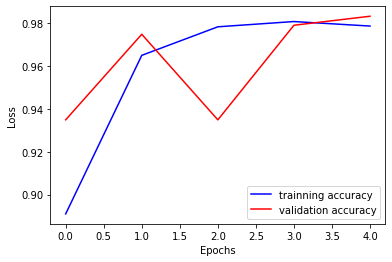

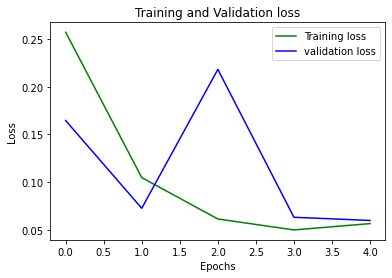

In [ ]:
import matplotlib.pyplot as plt

loss_train = np.array(history.history['loss'])
accuracy = np.array(history.history['accuracy'])
val_accuracy = np.array(history.history['val_accuracy'])
loss_val = np.array(history.history['val_loss'])

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('onefruit-cnn.model')

INFO:tensorflow:Assets written to: onefruit-cnn.model/assets
